   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Scaler saved at: ./Dataset/scaler.pkl


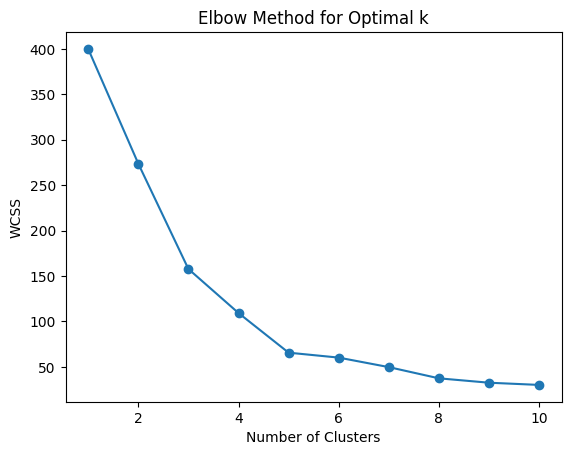

Silhouette Score: 0.5546571631111091
Model saved at: ./Dataset/kmeans_model.pkl


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib

# Load dataset
data_path = './Dataset/Mall_Customers.csv'
df = pd.read_csv(data_path)

# Display first few rows to understand the structure
print(df.head())

# Selecting relevant features for clustering
# Assuming we use Annual Income and Spending Score
features = df.iloc[:, [3, 4]].values  # Adjust based on dataset structure

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Save the scaler model
scaler_path = "./Dataset/scaler.pkl"
joblib.dump(scaler, scaler_path)
print(f"Scaler saved at: {scaler_path}")

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using an optimal k (Assuming 5 from the elbow method)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans.fit(features_scaled)

# Compute silhouette score
sil_score = silhouette_score(features_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

# Save the model
model_path = './Dataset/kmeans_model.pkl'
joblib.dump(kmeans, model_path)
print(f'Model saved at: {model_path}')
